In [1]:
import sys
sys.path.append('..')  # allow this notebook to find equal-level directories
%pylab inline
from importing_modules import *
# pyomo.environ as oe, seaborn as sns, plotly.plotly as py, plotly.graph_objs as go
# from util.gjh_wrapper import gjh_solve, make_df, from vis import acres_bars, zL_bars

Populating the interactive namespace from numpy and matplotlib


#### Load Solution Sequence

In [2]:
filename = 'output/costobj_difstartpts_alldfs_ipopt_2018-08-06_150211.csv'
df = pd.read_csv(os.path.join(projectpath, filename))
# display(df.head(2))
df.shape

(198, 12)

In [3]:
grouped = df.groupby(by=['bmpshortname', 'loadsource'])
len(grouped)
    

22

#### Pivot table for acres

In [4]:
# df['x'].head(5)
df['x'].tail(5)

193    ('UrbanNMPlanHR', 'N51133RL0_6450_0000', 'ntg'...
194    ('CoverCropTradRED', 'N51133RL0_6450_0000', 'g...
195    ('Injection', 'N51133RL0_6450_0000', 'dbl', 74.6)
196        ('HRTill', 'N51133RL0_6450_0000', 'dbl', 0.0)
197        ('HRTill', 'N51133RL0_6450_0000', 'gom', 0.0)
Name: x, dtype: object

In [5]:
# df_piv = df.pivot(index='tau', columns='x', values='acres')
# df_piv.reset_index(level=['tau'], inplace=True)  # make tau into a regular column
# df_piv['range']=df_piv.drop('tau', axis=1).apply(lambda x : list((0, int(math.ceil(np.nanmax(x))+1))), 1)
# df_piv['objective'] = df_piv['tau'].map(dict(zip(df.tau,df.solution_objectives)))  # solution_objectives
# # df_piv.head(2)

df_piv = df.pivot(index='startpointiterate', columns='x', values='acres')
display(df_piv.head(2))
df_piv.reset_index(level=['startpointiterate'], inplace=True)  # make tau into a regular column
display(df_piv.head(2))
df_piv['range']=df_piv.drop('startpointiterate', axis=1).apply(lambda x : list((0, int(math.ceil(np.nanmax(x))+1))), 1)
display(df_piv.head(2))
df_piv['objective'] = df_piv['startpointiterate'].map(dict(zip(df.startpointiterate,df.solution_objectives)))  # solution_objectives
display(df_piv.head(2))

x,"('BioSwale', 'N51133RL0_6450_0000', 'ntg', 989.19)","('ConPlan', 'N51133RL0_6450_0000', 'pas', 1.94)","('CoverCropTradRED', 'N51133RL0_6450_0000', 'gom', 68.94)","('DitchFilter', 'N51133RL0_6450_0000', 'pas', 10.05)","('HRTill', 'N51133RL0_6450_0000', 'dbl', 0.0)","('HRTill', 'N51133RL0_6450_0000', 'gom', 0.0)","('HRTill', 'N51133RL0_6450_0000', 'gwm', 0.0)","('HRTill', 'N51133RL0_6450_0000', 'oac', 0.0)","('HRTill', 'N51133RL0_6450_0000', 'sch', 0.0)","('HRTill', 'N51133RL0_6450_0000', 'scl', 0.0)",...,"('HRTill', 'N51133RL0_6450_0000', 'soy', 0.0)","('HRTill', 'N51133RL0_6450_0000', 'swm', 0.0)","('IncorpLowEarly', 'N51133RL0_6450_0000', 'gwm', 17.34)","('IncorpLowEarly', 'N51133RL0_6450_0000', 'soy', 17.34)","('Injection', 'N51133RL0_6450_0000', 'dbl', 74.6)","('UrbanNMPlanHR', 'N51133RL0_6450_0000', 'mcn', 0.0)","('UrbanNMPlanHR', 'N51133RL0_6450_0000', 'nch', 0.0)","('UrbanNMPlanHR', 'N51133RL0_6450_0000', 'ntg', 0.0)","('WetPondWetland', 'N51133RL0_6450_0000', 'nch', 377.47)","('WetPondWetland', 'N51133RL0_6450_0000', 'ntg', 377.47)"
startpointiterate,,,,,,,,,,,,,,,,,,,,,
1,768.559607,423.264714,3098.336554,423.264714,3524.195348,3629.329382,796.682137,259.937869,13.384193,18.467817,...,1631.665788,4.358737,796.682137,1631.665788,3524.195348,32.488785,2023.723409,2834.604032,2023.723409,2066.044425
2,768.559607,423.264714,3098.336554,423.264714,3524.195348,3629.329382,796.682137,259.937869,13.384193,18.467817,...,1631.665788,4.358737,796.682137,1631.665788,3524.195348,32.488785,2023.723409,2834.604032,2023.723409,2066.044425


x,startpointiterate,"('BioSwale', 'N51133RL0_6450_0000', 'ntg', 989.19)","('ConPlan', 'N51133RL0_6450_0000', 'pas', 1.94)","('CoverCropTradRED', 'N51133RL0_6450_0000', 'gom', 68.94)","('DitchFilter', 'N51133RL0_6450_0000', 'pas', 10.05)","('HRTill', 'N51133RL0_6450_0000', 'dbl', 0.0)","('HRTill', 'N51133RL0_6450_0000', 'gom', 0.0)","('HRTill', 'N51133RL0_6450_0000', 'gwm', 0.0)","('HRTill', 'N51133RL0_6450_0000', 'oac', 0.0)","('HRTill', 'N51133RL0_6450_0000', 'sch', 0.0)",...,"('HRTill', 'N51133RL0_6450_0000', 'soy', 0.0)","('HRTill', 'N51133RL0_6450_0000', 'swm', 0.0)","('IncorpLowEarly', 'N51133RL0_6450_0000', 'gwm', 17.34)","('IncorpLowEarly', 'N51133RL0_6450_0000', 'soy', 17.34)","('Injection', 'N51133RL0_6450_0000', 'dbl', 74.6)","('UrbanNMPlanHR', 'N51133RL0_6450_0000', 'mcn', 0.0)","('UrbanNMPlanHR', 'N51133RL0_6450_0000', 'nch', 0.0)","('UrbanNMPlanHR', 'N51133RL0_6450_0000', 'ntg', 0.0)","('WetPondWetland', 'N51133RL0_6450_0000', 'nch', 377.47)","('WetPondWetland', 'N51133RL0_6450_0000', 'ntg', 377.47)"
0,1,768.559607,423.264714,3098.336554,423.264714,3524.195348,3629.329382,796.682137,259.937869,13.384193,...,1631.665788,4.358737,796.682137,1631.665788,3524.195348,32.488785,2023.723409,2834.604032,2023.723409,2066.044425
1,2,768.559607,423.264714,3098.336554,423.264714,3524.195348,3629.329382,796.682137,259.937869,13.384193,...,1631.665788,4.358737,796.682137,1631.665788,3524.195348,32.488785,2023.723409,2834.604032,2023.723409,2066.044425


x,startpointiterate,"('BioSwale', 'N51133RL0_6450_0000', 'ntg', 989.19)","('ConPlan', 'N51133RL0_6450_0000', 'pas', 1.94)","('CoverCropTradRED', 'N51133RL0_6450_0000', 'gom', 68.94)","('DitchFilter', 'N51133RL0_6450_0000', 'pas', 10.05)","('HRTill', 'N51133RL0_6450_0000', 'dbl', 0.0)","('HRTill', 'N51133RL0_6450_0000', 'gom', 0.0)","('HRTill', 'N51133RL0_6450_0000', 'gwm', 0.0)","('HRTill', 'N51133RL0_6450_0000', 'oac', 0.0)","('HRTill', 'N51133RL0_6450_0000', 'sch', 0.0)",...,"('HRTill', 'N51133RL0_6450_0000', 'swm', 0.0)","('IncorpLowEarly', 'N51133RL0_6450_0000', 'gwm', 17.34)","('IncorpLowEarly', 'N51133RL0_6450_0000', 'soy', 17.34)","('Injection', 'N51133RL0_6450_0000', 'dbl', 74.6)","('UrbanNMPlanHR', 'N51133RL0_6450_0000', 'mcn', 0.0)","('UrbanNMPlanHR', 'N51133RL0_6450_0000', 'nch', 0.0)","('UrbanNMPlanHR', 'N51133RL0_6450_0000', 'ntg', 0.0)","('WetPondWetland', 'N51133RL0_6450_0000', 'nch', 377.47)","('WetPondWetland', 'N51133RL0_6450_0000', 'ntg', 377.47)",range
0,1,768.559607,423.264714,3098.336554,423.264714,3524.195348,3629.329382,796.682137,259.937869,13.384193,...,4.358737,796.682137,1631.665788,3524.195348,32.488785,2023.723409,2834.604032,2023.723409,2066.044425,"[0, 3631]"
1,2,768.559607,423.264714,3098.336554,423.264714,3524.195348,3629.329382,796.682137,259.937869,13.384193,...,4.358737,796.682137,1631.665788,3524.195348,32.488785,2023.723409,2834.604032,2023.723409,2066.044425,"[0, 3631]"


x,startpointiterate,"('BioSwale', 'N51133RL0_6450_0000', 'ntg', 989.19)","('ConPlan', 'N51133RL0_6450_0000', 'pas', 1.94)","('CoverCropTradRED', 'N51133RL0_6450_0000', 'gom', 68.94)","('DitchFilter', 'N51133RL0_6450_0000', 'pas', 10.05)","('HRTill', 'N51133RL0_6450_0000', 'dbl', 0.0)","('HRTill', 'N51133RL0_6450_0000', 'gom', 0.0)","('HRTill', 'N51133RL0_6450_0000', 'gwm', 0.0)","('HRTill', 'N51133RL0_6450_0000', 'oac', 0.0)","('HRTill', 'N51133RL0_6450_0000', 'sch', 0.0)",...,"('IncorpLowEarly', 'N51133RL0_6450_0000', 'gwm', 17.34)","('IncorpLowEarly', 'N51133RL0_6450_0000', 'soy', 17.34)","('Injection', 'N51133RL0_6450_0000', 'dbl', 74.6)","('UrbanNMPlanHR', 'N51133RL0_6450_0000', 'mcn', 0.0)","('UrbanNMPlanHR', 'N51133RL0_6450_0000', 'nch', 0.0)","('UrbanNMPlanHR', 'N51133RL0_6450_0000', 'ntg', 0.0)","('WetPondWetland', 'N51133RL0_6450_0000', 'nch', 377.47)","('WetPondWetland', 'N51133RL0_6450_0000', 'ntg', 377.47)",range,objective
0,1,768.559607,423.264714,3098.336554,423.264714,3524.195348,3629.329382,796.682137,259.937869,13.384193,...,796.682137,1631.665788,3524.195348,32.488785,2023.723409,2834.604032,2023.723409,2066.044425,"[0, 3631]",2.827703e+06
1,2,768.559607,423.264714,3098.336554,423.264714,3524.195348,3629.329382,796.682137,259.937869,13.384193,...,796.682137,1631.665788,3524.195348,32.488785,2023.723409,2834.604032,2023.723409,2066.044425,"[0, 3631]",2.827703e+06


In [6]:
df_piv.shape

(9, 25)

In [7]:
# df_piv['objective'].isnan()
# df['tau'].isnull().values.any()
# print(dict(zip(df.tau,df.solution_objectives)))

In [14]:
df_piv.drop(['startpointiterate', 'range', 'objective'], axis=1).values.max()

3629.32938199421

In [8]:
df_piv.head(2)

x,startpointiterate,"('BioSwale', 'N51133RL0_6450_0000', 'ntg', 989.19)","('ConPlan', 'N51133RL0_6450_0000', 'pas', 1.94)","('CoverCropTradRED', 'N51133RL0_6450_0000', 'gom', 68.94)","('DitchFilter', 'N51133RL0_6450_0000', 'pas', 10.05)","('HRTill', 'N51133RL0_6450_0000', 'dbl', 0.0)","('HRTill', 'N51133RL0_6450_0000', 'gom', 0.0)","('HRTill', 'N51133RL0_6450_0000', 'gwm', 0.0)","('HRTill', 'N51133RL0_6450_0000', 'oac', 0.0)","('HRTill', 'N51133RL0_6450_0000', 'sch', 0.0)",...,"('IncorpLowEarly', 'N51133RL0_6450_0000', 'gwm', 17.34)","('IncorpLowEarly', 'N51133RL0_6450_0000', 'soy', 17.34)","('Injection', 'N51133RL0_6450_0000', 'dbl', 74.6)","('UrbanNMPlanHR', 'N51133RL0_6450_0000', 'mcn', 0.0)","('UrbanNMPlanHR', 'N51133RL0_6450_0000', 'nch', 0.0)","('UrbanNMPlanHR', 'N51133RL0_6450_0000', 'ntg', 0.0)","('WetPondWetland', 'N51133RL0_6450_0000', 'nch', 377.47)","('WetPondWetland', 'N51133RL0_6450_0000', 'ntg', 377.47)",range,objective
0,1,768.559607,423.264714,3098.336554,423.264714,3524.195348,3629.329382,796.682137,259.937869,13.384193,...,796.682137,1631.665788,3524.195348,32.488785,2023.723409,2834.604032,2023.723409,2066.044425,"[0, 3631]",2.827703e+06
1,2,768.559607,423.264714,3098.336554,423.264714,3524.195348,3629.329382,796.682137,259.937869,13.384193,...,796.682137,1631.665788,3524.195348,32.488785,2023.723409,2834.604032,2023.723409,2066.044425,"[0, 3631]",2.827703e+06


#### Pivot table for gradient (g), if available

In [9]:
if 'g' in df.columns:
    df_g_piv = df.pivot(index='tau', columns='x', values='g')
    df_g_piv.reset_index(level=['tau'], inplace=True)  # make tau into a regular column
    df_g_piv['range']=df_g_piv.drop('tau', axis=1).apply(lambda x : list((0, int(math.ceil(np.nanmax(x))+1))), 1)
    df_g_piv['objective'] = df_g_piv['tau'].map(dict(zip(df.tau,df.solution_objectives)))  # solution_objectives
    # df_g_piv.head(2)
else:
    print("skipping because no column 'g'")

skipping because no column 'g'


# Visualizations

In [10]:
from vis.sequence_plot import plotly_costobj
from vis.acres_heatmap import heatmap_costobj

In [11]:
filenamestr = ''.join(['output/costobj_lineplot_difstartpts_', 'ipopt', '_',
                           datetime.now().strftime('%Y-%m-%d_%H%M%S'), '.png'])
savefilepathandname = os.path.join(projectpath, filenamestr)

fig = plotly_costobj(df=df_piv, xname='startpointiterate',
                    title='Minimal total cost for different starting points',
                    xlabel='Different starting point runs',
                    savefilepathandname=savefilepathandname)
py.iplot(fig, filename='styled-line')

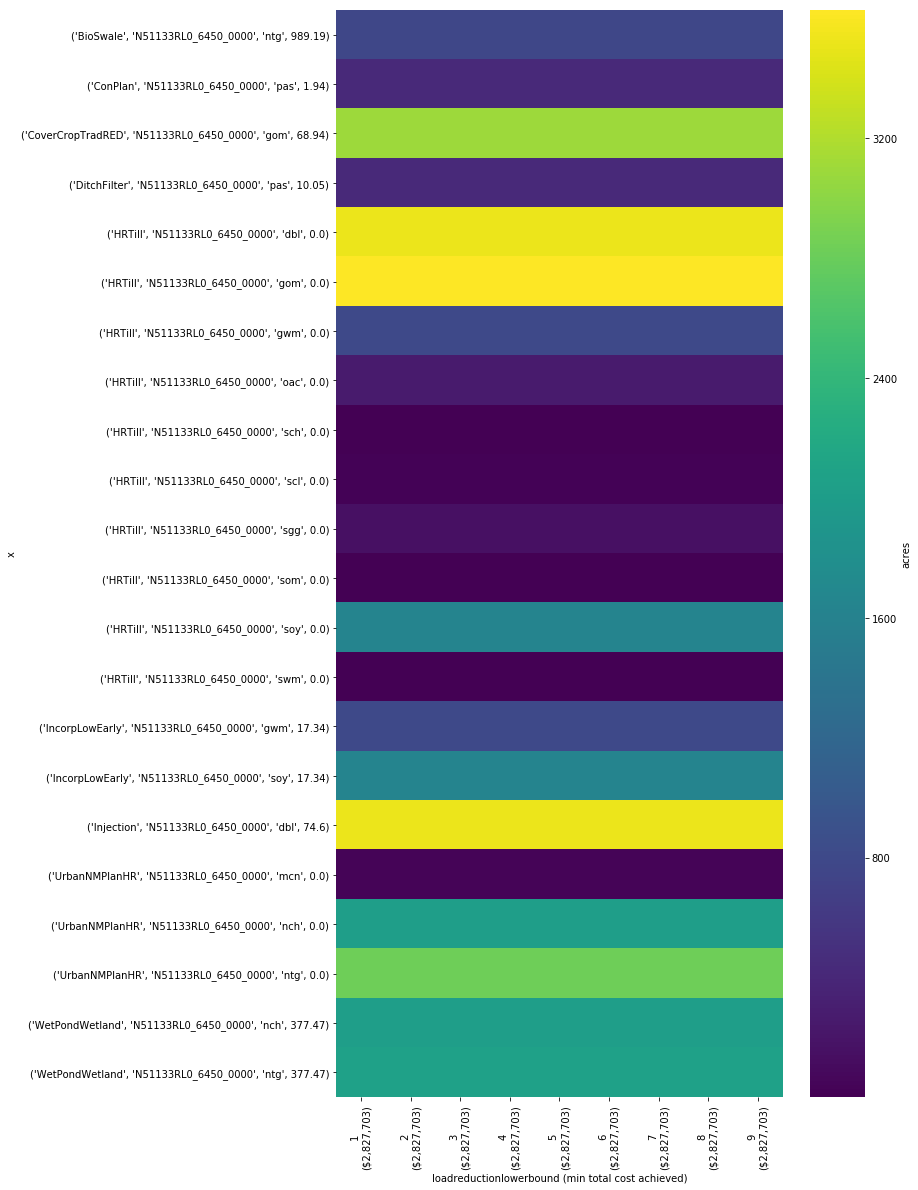

In [12]:
# Filepath to save to
timestamp = datetime.now().strftime('%Y-%m-%d_%H%M%S')
filenamestr = ''.join(['output/costobj_heatmap_difstartpts_', 'ipopt', '_',
                           timestamp, '.png'])
savefilepathandname = os.path.join(projectpath, filenamestr)

heatmap_costobj(df=df_piv, savefilepathandname=savefilepathandname, xname='startpointiterate')

In [13]:
# function to return ordered unique values
def f5(seq, idfun=None): 
   # order preserving
   if idfun is None:
       def idfun(x): return x
   seen = {}
   result = []
   for item in seq:
       marker = idfun(item)
       # in old Python versions:
       # if seen.has_key(marker)
       # but in new ones:
       if marker in seen: continue
       seen[marker] = 1
       result.append(item)
   return result

combospresent = f5(zip(df.bmpshortname, df.loadsource))
unique_bmpnames = set(df.bmpshortname)
unique_lsnames = f5(df.loadsource)

nvarsperbmp = {b:None for b in unique_bmpnames}
for b in unique_bmpnames:
    nvarsperbmp[b] = len([x for x in combospresent if (x[0]==b)])
maxvarsofabmp = max(nvarsperbmp.values())
print(maxvarsofabmp)

sorted_keys = sorted(nvarsperbmp.items(), key=lambda x: x[1])
unique_bmpnames = list(x[0] for x in sorted_keys)
print(sorted_keys)

10
[('Injection', 1), ('DitchFilter', 1), ('CoverCropTradRED', 1), ('BioSwale', 1), ('ConPlan', 1), ('WetPondWetland', 2), ('IncorpLowEarly', 2), ('UrbanNMPlanHR', 3), ('HRTill', 10)]


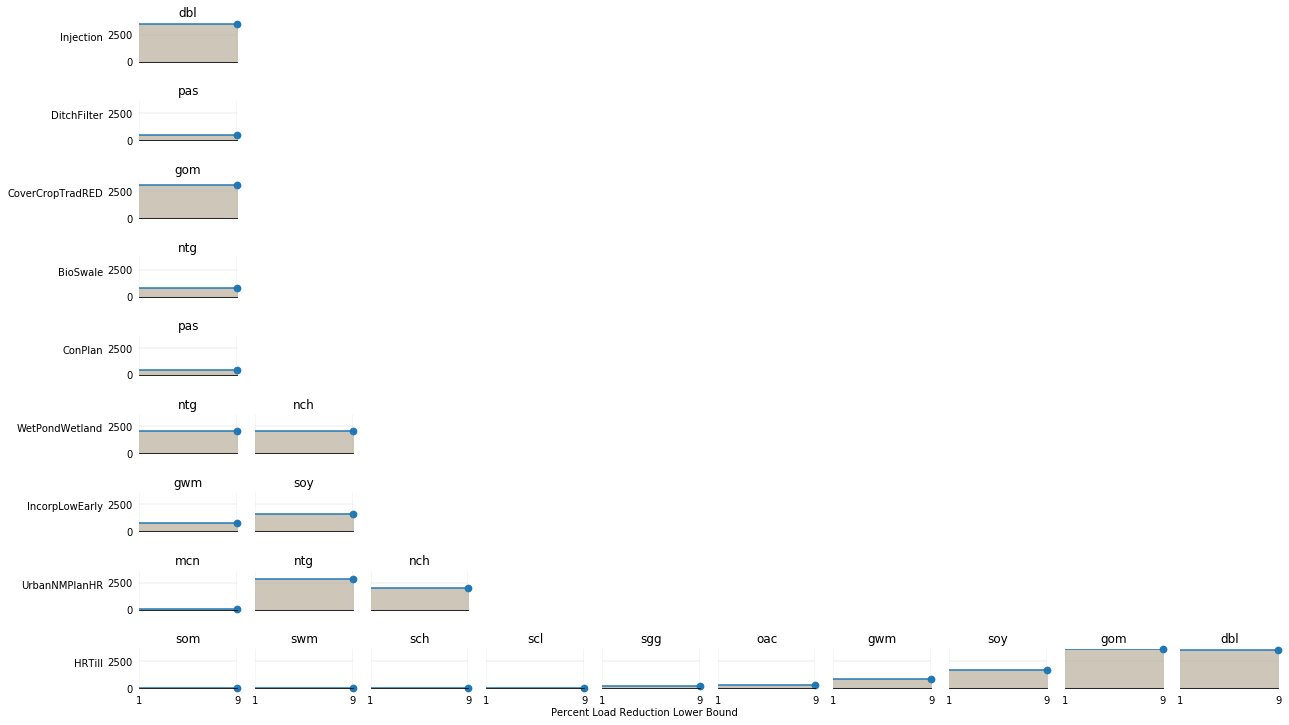

In [14]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=len(unique_bmpnames), ncols=maxvarsofabmp, sharex=True, sharey=True, figsize=(18,10))
axes_list = [item for sublist in axes for item in sublist] 

# ordered_var_names = df.groupby(by=['bmpshortname', 'loadsource'])['acres'].last().sort_values(ascending=False).index
        
from itertools import product
all_possibles = list(product(unique_bmpnames, unique_lsnames))
ordered_var_names = []
for posspair in all_possibles:
    if posspair in combospresent:
        ordered_var_names.append(posspair)

# Now instead of looping through the groupby
# you CREATE the groupby
# you LOOP through the ordered names
# and you use .get_group to get the right group
grouped = df.groupby(by=['bmpshortname', 'loadsource'])

first_x = df['startpointiterate'].min()
last_x = df['startpointiterate'].max()

max_acres = df['acres'].max()

i = {b:0 for b in unique_bmpnames}  # an empty dictionary of indices

for varname in ordered_var_names:
    selection = grouped.get_group(varname)

#     ax = axes_list.pop(0)
    bidx = unique_bmpnames.index(varname[0])
    ax = axes[bidx, i[varname[0]]]
    if i[varname[0]] == 0:
        ax.set_ylabel(varname[0], rotation=0, horizontalalignment='right')
    i[varname[0]] += 1
    axes_list.remove(ax)
    
    selection.plot(x='startpointiterate', y='acres', label=varname, ax=ax, legend=False)
    ax.fill_between(x=selection['startpointiterate'],y1=0,y2=selection['acres'],color='#cec6b9')
    
    ax.set_title(varname[1])
    ax.tick_params(
        which='both',
        bottom=False,
        left=False,
        right=False,
        top=False
    )
    ax.grid(linewidth=0.25)
    ax.set_xlim((first_x, last_x))
    ax.set_xlabel("")
    ax.set_xticks((first_x, last_x))
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    max_constraint = selection['startpointiterate'].max()
    acres_value = float(selection.loc[df['startpointiterate'] == max_constraint]['acres'])
    ax.set_ylim((0, max_acres))
    ax.scatter(x=[max_constraint], y=[acres_value], s=60, clip_on=False, linewidth=0)
#     ax.annotate(str(int(gdp_value / 1000)) + "k", xy=[max_year, gdp_value], xytext=[7, -2], textcoords='offset points')

# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
    
fig.text(0.5, 0.00, 'Percent Load Reduction Lower Bound', ha='center')
    
plt.tight_layout()
plt.subplots_adjust(hspace=1)

filenamestr = ''.join(['output/costobj_smallmult_difstartpts_', 'ipopt', '_',
                           datetime.now().strftime('%Y-%m-%d_%H%M%S'), '.png'])
savefilepathandname = os.path.join(projectpath, filenamestr)
plt.savefig(savefilepathandname)

In [15]:
fig = plt.figure(figsize=(16, 8))
parallel_coordinates(df_piv.drop('range', axis=1),
                     class_column='tau', colormap='viridis')

plt.xticks(rotation=90)

KeyError: 'tau'

<Figure size 1152x576 with 0 Axes>

In [ ]:
# Plotly Parallel Coordinates Plot (that doesn't work because the xaxis labels overlap, and there's no way to rotate them!!)

# print(df_piv['tau'].max(skipna=True))
# print(type(df_piv['tau'].max(skipna=True)))

# # print([np.nanmax(df_piv[x]) for x in list(df_piv[df_piv.columns.difference(['tau', 'range'])].columns.values)])
# data = [
#     go.Parcoords(
#         line = dict(color = df_piv['tau'],
#                     colorscale='Jet',
# #                     colorscale = [[0,'#D7C16B'],[0.5,'#23D8C3'],[1,'#F3F10F']],
#                    showscale=True),
#         dimensions = list([
#             dict(range=(0, np.nanmax(df_piv[x])), 
#                  label=str(x), 
#                  values=df_piv[x])
#             for x in list(df_piv[df_piv.columns.difference(['tau', 'range'])].columns.values)
#         ])
#     )
# ]

# layout = go.Layout(
#     plot_bgcolor = '#E5E5E5',
#     paper_bgcolor = '#E5E5E5',
#     xaxis=dict(tickangle = 90),
# )

# fig = go.Figure(data = data, layout = layout)
# py.iplot(fig, filename = 'parcoords-basic')